In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from cycler import cycler
import yaml

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
# typical one column figure width
FIG_WIDTH = 3.4 #8.636 cm

In [3]:
# load style

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


In [5]:
PL300K=pd.read_excel('./data/Datos_PL.xlsx', sheet_name='Hoja1')
PL300K=(np.array(PL300K['nm1']), np.array(PL300K['PL300K']))

PL200K=pd.read_excel('./data/Datos_PL.xlsx', sheet_name='Hoja1')
PL200K=(np.array(PL200K['nm2']), np.array(PL200K['PL200K']))

PL100K=pd.read_excel('./data/Datos_PL.xlsx', sheet_name='Hoja1')
PL100K=(np.array(PL100K['nm3']), np.array(PL100K['PL100K']))

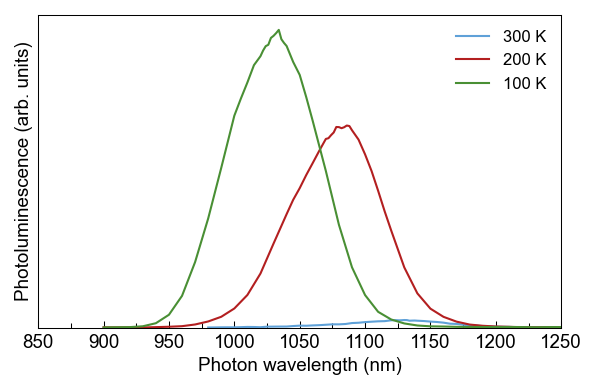

In [10]:
fig = plt.figure(figsize=(1.2*FIG_WIDTH, 2.7), dpi=DPI_PLOT)
ax = fig.add_subplot(111)

lw=1

ax.plot(PL300K[0], PL300K[1], c=colors['color1'], lw=lw, zorder=3, label='300 K')

ax.plot(PL200K[0], PL200K[1], c=colors['color2'], lw=lw, zorder=3, label='200 K')

ax.plot(PL100K[0], PL100K[1], c=colors['color3'], lw=lw, zorder=3, label='100 K')

ax.set_xlim(850,1250)
ax.set_ylim(0,None)
ax.set_xlabel('Photon wavelength (nm)')
ax.set_ylabel('Photoluminescence (arb. units)')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set(yticklabels=[])  # remove the tick labels
ax.set_yticks([]) # remove the ticks

plt.tight_layout()

plt.legend()

plt.savefig ('./PL.png', dpi=DPI_SAVE)